# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [68]:
import pandas as pd
import numpy as np
%cd ./05data

/home/baronefr/Documents/lab_local/05data


## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [2]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')     # every key also becomes a method!  xs['f'] is the same as xs.f
print (xs[['d', 'f', 'h']], '\n')     # you can use the comma to show all the elements
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [3]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [4]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d) # eterogeneous series

b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [9]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]   # (no first element) + (no last element)
print(s)

a   -0.710194
b   -0.202789
c   -1.037809
d   -0.232084
e    0.506596
dtype: float64
a         NaN
b   -0.405577
c   -2.075617
d   -0.464167
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [11]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2021,11,22,12,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 22 2021'
# or alternatively
date = '22/11/2021 12:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D') # prints seven days starting from november 22
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)

2021-11-22
2021-11-22 12:45:10.000015
22/11/2021 12:45:00
DatetimeIndex(['2021-11-22 12:45:00', '2021-11-23 12:45:00',
               '2021-11-24 12:45:00', '2021-11-25 12:45:00',
               '2021-11-26 12:45:00', '2021-11-27 12:45:00',
               '2021-11-28 12:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2021-11-22 12:45:00', '2021-11-22 12:45:01',
               '2021-11-22 12:45:02', '2021-11-22 12:45:03',
               '2021-11-22 12:45:04', '2021-11-22 12:45:05',
               '2021-11-22 12:45:06', '2021-11-22 12:45:07',
               '2021-11-22 12:45:08', '2021-11-22 12:45:09',
               ...
               '2021-11-22 13:44:50', '2021-11-22 13:44:51',
               '2021-11-22 13:44:52', '2021-11-22 13:44:53',
               '2021-11-22 13:44:54', '2021-11-22 13:44:55',
               '2021-11-22 13:44:56', '2021-11-22 13:44:57',
               '2021-11-22 13:44:58', '2021-11-22 13:44:59'],
              dtype='datetime64[ns]', leng

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [12]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)

1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [14]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2021-11-22':'2021-11-23'], '\n') # Note - includes end time

2021-11-22 12:45:00    8.751851
2021-11-23 12:45:00    9.881785
2021-11-24 12:45:00    9.917740
2021-11-25 12:45:00    9.203688
Freq: D, dtype: float64 

2021-11-22 12:45:00    8.751851
2021-11-23 12:45:00    9.881785
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [15]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [16]:
entries=10
dates=pd.date_range('11/22/2021 12:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df

,A,B,C,D
2021-11-22 12:45:00,-0.031088,-1.543658,-0.336723,0.356022
2021-11-22 13:45:00,1.469201,-0.931727,0.029513,0.238571
2021-11-22 14:45:00,1.520909,2.004446,-2.562222,-0.064707
2021-11-22 15:45:00,-0.909680,0.758376,-0.653143,1.183470
2021-11-22 16:45:00,0.863330,-0.266789,0.001178,-0.358003
2021-11-22 17:45:00,0.341480,0.222535,-0.847461,-1.382588
2021-11-22 18:45:00,-0.196637,-0.184746,1.038412,0.048664
2021-11-22 19:45:00,0.716952,0.078944,0.061007,-0.500409
2021-11-22 20:45:00,-1.332359,-0.539441,-0.227229,-0.685076
2021-11-22 21:45:00,0.497038,-0.489034,0.901155,-0.908734


or by means of a dictionary:


In [21]:
df2 = pd.DataFrame(
    { 'A' : 1.,  # this will be broadcasted
      'B' : pd.Timestamp('20130102'),  # this will be broadcasted too
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

# check what happens if D and E had different lenghts  --> error

# also notice that by default the indexes are 0, 1, 2, ... if not otherwise provided

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [22]:
df.head(2)

,A,B,C,D
2021-11-22 12:45:00,-0.031088,-1.543658,-0.336723,0.356022
2021-11-22 13:45:00,1.469201,-0.931727,0.029513,0.238571


In [23]:
df.tail(4)

,A,B,C,D
2021-11-22 18:45:00,-0.196637,-0.184746,1.038412,0.048664
2021-11-22 19:45:00,0.716952,0.078944,0.061007,-0.500409
2021-11-22 20:45:00,-1.332359,-0.539441,-0.227229,-0.685076
2021-11-22 21:45:00,0.497038,-0.489034,0.901155,-0.908734


In [24]:
df.index

DatetimeIndex(['2021-11-22 12:45:00', '2021-11-22 13:45:00',
               '2021-11-22 14:45:00', '2021-11-22 15:45:00',
               '2021-11-22 16:45:00', '2021-11-22 17:45:00',
               '2021-11-22 18:45:00', '2021-11-22 19:45:00',
               '2021-11-22 20:45:00', '2021-11-22 21:45:00'],
              dtype='datetime64[ns]', freq='H')

In [25]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [26]:
df.values

array([[-3.10879226e-02, -1.54365813e+00, -3.36722563e-01,
         3.56022326e-01],
       [ 1.46920128e+00, -9.31726691e-01,  2.95132685e-02,
         2.38570729e-01],
       [ 1.52090864e+00,  2.00444623e+00, -2.56222247e+00,
        -6.47072447e-02],
       [-9.09679612e-01,  7.58375744e-01, -6.53142653e-01,
         1.18346970e+00],
       [ 8.63330049e-01, -2.66789372e-01,  1.17845191e-03,
        -3.58003188e-01],
       [ 3.41480258e-01,  2.22534717e-01, -8.47460711e-01,
        -1.38258769e+00],
       [-1.96637014e-01, -1.84745978e-01,  1.03841200e+00,
         4.86643887e-02],
       [ 7.16951583e-01,  7.89438919e-02,  6.10068233e-02,
        -5.00409330e-01],
       [-1.33235887e+00, -5.39441429e-01, -2.27229245e-01,
        -6.85075637e-01],
       [ 4.97037644e-01, -4.89034125e-01,  9.01154988e-01,
        -9.08734151e-01]])

In [27]:
df.describe()  # prints statistics on the values

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.293915,-0.089110,-0.259551,-0.207279
std,0.935307,0.969292,1.005324,0.726210
min,-1.332359,-1.543658,-2.562222,-1.382588
25%,-0.155250,-0.526840,-0.574038,-0.638909
50%,0.419259,-0.225768,-0.113025,-0.211355
75%,0.826735,0.186637,0.053133,0.191094
max,1.520909,2.004446,1.038412,1.183470


In [28]:
df.T

,2021-11-22 12:45:00,2021-11-22 13:45:00,2021-11-22 14:45:00,2021-11-22 15:45:00,2021-11-22 16:45:00,2021-11-22 17:45:00,2021-11-22 18:45:00,2021-11-22 19:45:00,2021-11-22 20:45:00,2021-11-22 21:45:00
A,-0.031088,1.469201,1.520909,-0.909680,0.863330,0.341480,-0.196637,0.716952,-1.332359,0.497038
B,-1.543658,-0.931727,2.004446,0.758376,-0.266789,0.222535,-0.184746,0.078944,-0.539441,-0.489034
C,-0.336723,0.029513,-2.562222,-0.653143,0.001178,-0.847461,1.038412,0.061007,-0.227229,0.901155
D,0.356022,0.238571,-0.064707,1.183470,-0.358003,-1.382588,0.048664,-0.500409,-0.685076,-0.908734


In [29]:
df.sort_index(axis=0,ascending=True)

,A,B,C,D
2021-11-22 12:45:00,-0.031088,-1.543658,-0.336723,0.356022
2021-11-22 13:45:00,1.469201,-0.931727,0.029513,0.238571
2021-11-22 14:45:00,1.520909,2.004446,-2.562222,-0.064707
2021-11-22 15:45:00,-0.909680,0.758376,-0.653143,1.183470
2021-11-22 16:45:00,0.863330,-0.266789,0.001178,-0.358003
2021-11-22 17:45:00,0.341480,0.222535,-0.847461,-1.382588
2021-11-22 18:45:00,-0.196637,-0.184746,1.038412,0.048664
2021-11-22 19:45:00,0.716952,0.078944,0.061007,-0.500409
2021-11-22 20:45:00,-1.332359,-0.539441,-0.227229,-0.685076
2021-11-22 21:45:00,0.497038,-0.489034,0.901155,-0.908734


In [30]:
df.sort_values(by="C") # sorting by increasing C

,A,B,C,D
2021-11-22 14:45:00,1.520909,2.004446,-2.562222,-0.064707
2021-11-22 17:45:00,0.341480,0.222535,-0.847461,-1.382588
2021-11-22 15:45:00,-0.909680,0.758376,-0.653143,1.183470
2021-11-22 12:45:00,-0.031088,-1.543658,-0.336723,0.356022
2021-11-22 20:45:00,-1.332359,-0.539441,-0.227229,-0.685076
2021-11-22 16:45:00,0.863330,-0.266789,0.001178,-0.358003
2021-11-22 13:45:00,1.469201,-0.931727,0.029513,0.238571
2021-11-22 19:45:00,0.716952,0.078944,0.061007,-0.500409
2021-11-22 21:45:00,0.497038,-0.489034,0.901155,-0.908734
2021-11-22 18:45:00,-0.196637,-0.184746,1.038412,0.048664


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [31]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column... ex: 'A casa mia' column name)
print (df.A)

2021-11-22 12:45:00   -0.031088
2021-11-22 13:45:00    1.469201
2021-11-22 14:45:00    1.520909
2021-11-22 15:45:00   -0.909680
2021-11-22 16:45:00    0.863330
2021-11-22 17:45:00    0.341480
2021-11-22 18:45:00   -0.196637
2021-11-22 19:45:00    0.716952
2021-11-22 20:45:00   -1.332359
2021-11-22 21:45:00    0.497038
Freq: H, Name: A, dtype: float64 

2021-11-22 12:45:00   -0.031088
2021-11-22 13:45:00    1.469201
2021-11-22 14:45:00    1.520909
2021-11-22 15:45:00   -0.909680
2021-11-22 16:45:00    0.863330
2021-11-22 17:45:00    0.341480
2021-11-22 18:45:00   -0.196637
2021-11-22 19:45:00    0.716952
2021-11-22 20:45:00   -1.332359
2021-11-22 21:45:00    0.497038
Freq: H, Name: A, dtype: float64


In [ ]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2021-11-22 12:45:00":"2021-11-22 14:45:00"])

### Selection by label

In [32]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]   # you get a data frame make out of elements based on the label

A   -0.031088
B   -1.543658
C   -0.336723
D    0.356022
Name: 2021-11-22 12:45:00, dtype: float64

In [33]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]   # "I want columns A and B for all indexes"
#a=df.loc[:,['A','B']]

,A,B
2021-11-22 12:45:00,-0.031088,-1.543658
2021-11-22 13:45:00,1.469201,-0.931727
2021-11-22 14:45:00,1.520909,2.004446
2021-11-22 15:45:00,-0.909680,0.758376
2021-11-22 16:45:00,0.863330,-0.266789
2021-11-22 17:45:00,0.341480,0.222535
2021-11-22 18:45:00,-0.196637,-0.184746
2021-11-22 19:45:00,0.716952,0.078944
2021-11-22 20:45:00,-1.332359,-0.539441
2021-11-22 21:45:00,0.497038,-0.489034


In [34]:
# showing label slicing, both endpoints are included:
df.loc['2021-11-22 16:45:00':'2021-11-22 18:45:00',['A','B']]

,A,B
2021-11-22 16:45:00,0.863330,-0.266789
2021-11-22 17:45:00,0.341480,0.222535
2021-11-22 18:45:00,-0.196637,-0.184746


In [ ]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

### Selecting by position

In [35]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A   -0.909680
B    0.758376
C   -0.653143
D    1.183470
Name: 2021-11-22 15:45:00, dtype: float64 

                           A         B
2021-11-22 15:45:00 -0.90968  0.758376
2021-11-22 16:45:00  0.86333 -0.266789


In [36]:
# selecting rows 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2021-11-22 13:45:00,1.469201,0.029513
2021-11-22 14:45:00,1.520909,-2.562222
2021-11-22 16:45:00,0.863330,0.001178


In [37]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2021-11-22 13:45:00  1.469201 -0.931727  0.029513  0.238571
2021-11-22 14:45:00  1.520909  2.004446 -2.562222 -0.064707 

                            B         C
2021-11-22 12:45:00 -1.543658 -0.336723
2021-11-22 13:45:00 -0.931727  0.029513
2021-11-22 14:45:00  2.004446 -2.562222
2021-11-22 15:45:00  0.758376 -0.653143
2021-11-22 16:45:00 -0.266789  0.001178
2021-11-22 17:45:00  0.222535 -0.847461
2021-11-22 18:45:00 -0.184746  1.038412
2021-11-22 19:45:00  0.078944  0.061007
2021-11-22 20:45:00 -0.539441 -0.227229
2021-11-22 21:45:00 -0.489034  0.901155


In [38]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


-0.9317266908736884

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [44]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0] # selecting the entries for which B values are grater than zero

,A,B,C,D
2021-11-22 14:45:00,1.520909,2.004446,-2.562222,-0.064707
2021-11-22 15:45:00,-0.909680,0.758376,-0.653143,1.183470
2021-11-22 17:45:00,0.341480,0.222535,-0.847461,-1.382588
2021-11-22 19:45:00,0.716952,0.078944,0.061007,-0.500409


In [43]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2021-11-22 12:45:00,NaN,NaN,NaN,0.356022
2021-11-22 13:45:00,1.469201,NaN,0.029513,0.238571
2021-11-22 14:45:00,1.520909,2.004446,NaN,NaN
2021-11-22 15:45:00,NaN,0.758376,NaN,1.183470
2021-11-22 16:45:00,0.863330,NaN,0.001178,NaN
2021-11-22 17:45:00,0.341480,0.222535,NaN,NaN
2021-11-22 18:45:00,NaN,NaN,1.038412,0.048664
2021-11-22 19:45:00,0.716952,0.078944,0.061007,NaN
2021-11-22 20:45:00,NaN,NaN,NaN,NaN
2021-11-22 21:45:00,0.497038,NaN,0.901155,NaN


### Setting

Combination of selection and setting of values

In [47]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)

,A,B,C,D,E,E prime
2021-11-22 12:45:00,0.000000,-1.543658,-0.336723,5,0.0,0
2021-11-22 13:45:00,1.469201,-0.931727,0.029513,5,0.5,2
2021-11-22 14:45:00,1.520909,2.004446,-2.562222,5,1.0,4
2021-11-22 15:45:00,-0.909680,0.758376,-0.653143,5,1.5,6
2021-11-22 16:45:00,0.863330,-0.266789,0.001178,5,2.0,8
2021-11-22 17:45:00,0.341480,0.222535,-0.847461,5,2.5,10
2021-11-22 18:45:00,-0.196637,-0.184746,1.038412,5,3.0,12
2021-11-22 19:45:00,0.716952,0.078944,0.061007,5,3.5,14
2021-11-22 20:45:00,-1.332359,-0.539441,-0.227229,5,4.0,16
2021-11-22 21:45:00,0.497038,-0.489034,0.901155,5,4.5,18


In [48]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-1.543658,-0.336723,5,0.0,0,1.000000
2021-11-22 13:45:00,1.469201,-0.931727,0.029513,5,0.5,2,0.999962
2021-11-22 14:45:00,1.520909,2.004446,-2.562222,5,1.0,4,0.999848
2021-11-22 15:45:00,-0.909680,0.758376,-0.653143,5,1.5,6,0.999657
2021-11-22 16:45:00,0.863330,-0.266789,0.001178,5,2.0,8,0.999391
2021-11-22 17:45:00,0.341480,0.222535,-0.847461,5,2.5,10,0.999048
2021-11-22 18:45:00,-0.196637,-0.184746,1.038412,5,3.0,12,0.998630
2021-11-22 19:45:00,0.716952,0.078944,0.061007,5,3.5,14,0.998135
2021-11-22 20:45:00,-1.332359,-0.539441,-0.227229,5,4.0,16,0.997564
2021-11-22 21:45:00,0.497038,-0.489034,0.901155,5,4.5,18,0.996917


In [49]:
# another example of global setting
df2=df.copy()

df2[df2>0] = -df2 # this takes all the positive values of df2 and changes their sign
df2

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-1.543658,-0.336723,-5,0.0,0,-1.000000
2021-11-22 13:45:00,-1.469201,-0.931727,-0.029513,-5,-0.5,-2,-0.999962
2021-11-22 14:45:00,-1.520909,-2.004446,-2.562222,-5,-1.0,-4,-0.999848
2021-11-22 15:45:00,-0.909680,-0.758376,-0.653143,-5,-1.5,-6,-0.999657
2021-11-22 16:45:00,-0.863330,-0.266789,-0.001178,-5,-2.0,-8,-0.999391
2021-11-22 17:45:00,-0.341480,-0.222535,-0.847461,-5,-2.5,-10,-0.999048
2021-11-22 18:45:00,-0.196637,-0.184746,-1.038412,-5,-3.0,-12,-0.998630
2021-11-22 19:45:00,-0.716952,-0.078944,-0.061007,-5,-3.5,-14,-0.998135
2021-11-22 20:45:00,-1.332359,-0.539441,-0.227229,-5,-4.0,-16,-0.997564
2021-11-22 21:45:00,-0.497038,-0.489034,-0.901155,-5,-4.5,-18,-0.996917


In [51]:
df # df has not changed in the previous section because we copied the objectEXR04

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-1.543658,-0.336723,5,0.0,0,1.000000
2021-11-22 13:45:00,1.469201,-0.931727,0.029513,5,0.5,2,0.999962
2021-11-22 14:45:00,1.520909,2.004446,-2.562222,5,1.0,4,0.999848
2021-11-22 15:45:00,-0.909680,0.758376,-0.653143,5,1.5,6,0.999657
2021-11-22 16:45:00,0.863330,-0.266789,0.001178,5,2.0,8,0.999391
2021-11-22 17:45:00,0.341480,0.222535,-0.847461,5,2.5,10,0.999048
2021-11-22 18:45:00,-0.196637,-0.184746,1.038412,5,3.0,12,0.998630
2021-11-22 19:45:00,0.716952,0.078944,0.061007,5,3.5,14,0.998135
2021-11-22 20:45:00,-1.332359,-0.539441,-0.227229,5,4.0,16,0.997564
2021-11-22 21:45:00,0.497038,-0.489034,0.901155,5,4.5,18,0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [52]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
new_df=df.drop(columns=['E prime'])  # in this copy there is no 'E prime'
new_df

,A,B,C,D,E,cosine
2021-11-22 12:45:00,0.000000,-1.543658,-0.336723,5,0.0,1.000000
2021-11-22 13:45:00,1.469201,-0.931727,0.029513,5,0.5,0.999962
2021-11-22 14:45:00,1.520909,2.004446,-2.562222,5,1.0,0.999848
2021-11-22 15:45:00,-0.909680,0.758376,-0.653143,5,1.5,0.999657
2021-11-22 16:45:00,0.863330,-0.266789,0.001178,5,2.0,0.999391
2021-11-22 17:45:00,0.341480,0.222535,-0.847461,5,2.5,0.999048
2021-11-22 18:45:00,-0.196637,-0.184746,1.038412,5,3.0,0.998630
2021-11-22 19:45:00,0.716952,0.078944,0.061007,5,3.5,0.998135
2021-11-22 20:45:00,-1.332359,-0.539441,-0.227229,5,4.0,0.997564
2021-11-22 21:45:00,0.497038,-0.489034,0.901155,5,4.5,0.996917


In [53]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-1.543658,-0.336723,5,0.0,0,1.000000
2021-11-22 17:45:00,0.341480,0.222535,-0.847461,5,2.5,10,0.999048
2021-11-22 18:45:00,-0.196637,-0.184746,1.038412,5,3.0,12,0.998630
2021-11-22 19:45:00,0.716952,0.078944,0.061007,5,3.5,14,0.998135
2021-11-22 20:45:00,-1.332359,-0.539441,-0.227229,5,4.0,16,0.997564
2021-11-22 21:45:00,0.497038,-0.489034,0.901155,5,4.5,18,0.996917


In [54]:
df

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-1.543658,-0.336723,5,0.0,0,1.000000
2021-11-22 13:45:00,1.469201,-0.931727,0.029513,5,0.5,2,0.999962
2021-11-22 14:45:00,1.520909,2.004446,-2.562222,5,1.0,4,0.999848
2021-11-22 15:45:00,-0.909680,0.758376,-0.653143,5,1.5,6,0.999657
2021-11-22 16:45:00,0.863330,-0.266789,0.001178,5,2.0,8,0.999391
2021-11-22 17:45:00,0.341480,0.222535,-0.847461,5,2.5,10,0.999048
2021-11-22 18:45:00,-0.196637,-0.184746,1.038412,5,3.0,12,0.998630
2021-11-22 19:45:00,0.716952,0.078944,0.061007,5,3.5,14,0.998135
2021-11-22 20:45:00,-1.332359,-0.539441,-0.227229,5,4.0,16,0.997564
2021-11-22 21:45:00,0.497038,-0.489034,0.901155,5,4.5,18,0.996917


In [55]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2021-11-22 20:45:00"))

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-1.543658,-0.336723,5,0.0,0,1.000000
2021-11-22 13:45:00,1.469201,-0.931727,0.029513,5,0.5,2,0.999962
2021-11-22 14:45:00,1.520909,2.004446,-2.562222,5,1.0,4,0.999848
2021-11-22 15:45:00,-0.909680,0.758376,-0.653143,5,1.5,6,0.999657
2021-11-22 16:45:00,0.863330,-0.266789,0.001178,5,2.0,8,0.999391
2021-11-22 17:45:00,0.341480,0.222535,-0.847461,5,2.5,10,0.999048
2021-11-22 18:45:00,-0.196637,-0.184746,1.038412,5,3.0,12,0.998630
2021-11-22 19:45:00,0.716952,0.078944,0.061007,5,3.5,14,0.998135
2021-11-22 21:45:00,0.497038,-0.489034,0.901155,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [56]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,NaN,NaN,NaN,5,NaN,NaN,1.000000
2021-11-22 13:45:00,1.469201,NaN,0.029513,5,0.5,2.0,0.999962
2021-11-22 14:45:00,1.520909,2.004446,NaN,5,1.0,4.0,0.999848
2021-11-22 15:45:00,NaN,0.758376,NaN,5,1.5,6.0,0.999657
2021-11-22 16:45:00,0.863330,NaN,0.001178,5,2.0,8.0,0.999391
2021-11-22 17:45:00,0.341480,0.222535,NaN,5,2.5,10.0,0.999048
2021-11-22 18:45:00,NaN,NaN,1.038412,5,3.0,12.0,0.998630
2021-11-22 19:45:00,0.716952,0.078944,0.061007,5,3.5,14.0,0.998135
2021-11-22 20:45:00,NaN,NaN,NaN,5,4.0,16.0,0.997564
2021-11-22 21:45:00,0.497038,NaN,0.901155,5,4.5,18.0,0.996917


In [57]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine
2021-11-22 19:45:00,0.716952,0.078944,0.061007,5,3.5,14.0,0.998135


In [58]:
# getting a mask of NaN positions
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,True,True,True,False,True,True,False
2021-11-22 13:45:00,False,True,False,False,False,False,False
2021-11-22 14:45:00,False,False,True,False,False,False,False
2021-11-22 15:45:00,True,False,True,False,False,False,False
2021-11-22 16:45:00,False,True,False,False,False,False,False
2021-11-22 17:45:00,False,False,True,False,False,False,False
2021-11-22 18:45:00,True,True,False,False,False,False,False
2021-11-22 19:45:00,False,False,False,False,False,False,False
2021-11-22 20:45:00,True,True,True,False,False,False,False
2021-11-22 21:45:00,False,True,False,False,False,False,False


In [59]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,0.000000,0.000000,5,0.0,0.0,1.000000
2021-11-22 13:45:00,1.469201,0.000000,0.029513,5,0.5,2.0,0.999962
2021-11-22 14:45:00,1.520909,2.004446,0.000000,5,1.0,4.0,0.999848
2021-11-22 15:45:00,0.000000,0.758376,0.000000,5,1.5,6.0,0.999657
2021-11-22 16:45:00,0.863330,0.000000,0.001178,5,2.0,8.0,0.999391
2021-11-22 17:45:00,0.341480,0.222535,0.000000,5,2.5,10.0,0.999048
2021-11-22 18:45:00,0.000000,0.000000,1.038412,5,3.0,12.0,0.998630
2021-11-22 19:45:00,0.716952,0.078944,0.061007,5,3.5,14.0,0.998135
2021-11-22 20:45:00,0.000000,0.000000,0.000000,5,4.0,16.0,0.997564
2021-11-22 21:45:00,0.497038,0.000000,0.901155,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [60]:
df_wNan.fillna(method='pad')  # this is a black box, don't use this

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,NaN,NaN,NaN,5,NaN,NaN,1.000000
2021-11-22 13:45:00,1.469201,NaN,0.029513,5,0.5,2.0,0.999962
2021-11-22 14:45:00,1.520909,2.004446,0.029513,5,1.0,4.0,0.999848
2021-11-22 15:45:00,1.520909,0.758376,0.029513,5,1.5,6.0,0.999657
2021-11-22 16:45:00,0.863330,0.758376,0.001178,5,2.0,8.0,0.999391
2021-11-22 17:45:00,0.341480,0.222535,0.001178,5,2.5,10.0,0.999048
2021-11-22 18:45:00,0.341480,0.222535,1.038412,5,3.0,12.0,0.998630
2021-11-22 19:45:00,0.716952,0.078944,0.061007,5,3.5,14.0,0.998135
2021-11-22 20:45:00,0.716952,0.078944,0.061007,5,4.0,16.0,0.997564
2021-11-22 21:45:00,0.497038,0.078944,0.901155,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [61]:
# Some statistics (mean() just as an example)
# rows
print (df.mean(axis=0),'\n') # this is nosense!
# columns
print (df.mean(axis=1),'\n')

A          0.297023
B         -0.089110
C         -0.259551
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2021-11-22 12:45:00    0.588517
2021-11-22 13:45:00    1.295279
2021-11-22 14:45:00    1.708997
2021-11-22 15:45:00    1.813602
2021-11-22 16:45:00    2.371016
2021-11-22 17:45:00    2.602229
2021-11-22 18:45:00    3.093666
2021-11-22 19:45:00    3.479291
2021-11-22 20:45:00    3.414076
2021-11-22 21:45:00    4.200868
Freq: H, dtype: float64 



In [63]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-1.543658,-0.336723,5,0.0,0,1.000000
2021-11-22 13:45:00,1.469201,-2.475385,-0.307209,10,0.5,2,1.999962
2021-11-22 14:45:00,2.990110,-0.470939,-2.869432,15,1.5,6,2.999810
2021-11-22 15:45:00,2.080430,0.287437,-3.522574,20,3.0,12,3.999467
2021-11-22 16:45:00,2.943760,0.020648,-3.521396,25,5.0,20,4.998858
2021-11-22 17:45:00,3.285241,0.243183,-4.368857,30,7.5,30,5.997906
2021-11-22 18:45:00,3.088604,0.058437,-3.330445,35,10.5,42,6.996536
2021-11-22 19:45:00,3.805555,0.137380,-3.269438,40,14.0,56,7.994670
2021-11-22 20:45:00,2.473196,-0.402061,-3.496667,45,18.0,72,8.992234
2021-11-22 21:45:00,2.970234,-0.891095,-2.595512,50,22.5,90,9.989152


In [64]:
df

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-1.543658,-0.336723,5,0.0,0,1.000000
2021-11-22 13:45:00,1.469201,-0.931727,0.029513,5,0.5,2,0.999962
2021-11-22 14:45:00,1.520909,2.004446,-2.562222,5,1.0,4,0.999848
2021-11-22 15:45:00,-0.909680,0.758376,-0.653143,5,1.5,6,0.999657
2021-11-22 16:45:00,0.863330,-0.266789,0.001178,5,2.0,8,0.999391
2021-11-22 17:45:00,0.341480,0.222535,-0.847461,5,2.5,10,0.999048
2021-11-22 18:45:00,-0.196637,-0.184746,1.038412,5,3.0,12,0.998630
2021-11-22 19:45:00,0.716952,0.078944,0.061007,5,3.5,14,0.998135
2021-11-22 20:45:00,-1.332359,-0.539441,-0.227229,5,4.0,16,0.997564
2021-11-22 21:45:00,0.497038,-0.489034,0.901155,5,4.5,18,0.996917


In [66]:
  df.apply(lambda x: x.max() - x.min())  # gets the range of each column

A           2.853268
B           3.548104
C           3.600634
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [67]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2021-11-22 12:45:00   -1.543658
2021-11-22 13:45:00    0.537475
2021-11-22 14:45:00    3.525355
2021-11-22 15:45:00   -0.151304
2021-11-22 16:45:00    0.596541
2021-11-22 17:45:00    0.564015
2021-11-22 18:45:00   -0.381383
2021-11-22 19:45:00    0.795895
2021-11-22 20:45:00   -1.871800
2021-11-22 21:45:00    0.008004
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [72]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt

file_name="./data_000637.txt"
data=pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


Let's now do some operations among (elements of) columns

In [73]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [74]:
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
               ...     
1310715    19061.666667
1310716    19084.166667
1310717    19100.000000
1310718    19225.000000
1310719    19065.000000
Name: timens, Length: 1310720, dtype: float64

In [75]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [76]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,-1.686339,-0.368077,-0.028471,0.024736
1,-0.278403,0.143055,-0.037328,-0.862823
2,-1.127040,0.647314,-0.205185,-0.383959
3,1.046894,0.813253,-0.326054,-0.767250
4,0.796314,0.757720,0.195556,0.685724
5,0.264772,1.860357,0.911394,-1.381116
6,0.966330,-0.751032,0.903290,1.152843
7,-0.272258,-1.358731,0.064316,-1.064782
8,0.310843,-1.865195,-0.787695,-0.913740
9,0.309104,2.064116,0.665806,-1.221736


In [77]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0 -1.686339 -0.368077 -0.028471  0.024736
 1 -0.278403  0.143055 -0.037328 -0.862823
 2 -1.127040  0.647314 -0.205185 -0.383959,
           0         1         2         3
 3  1.046894  0.813253 -0.326054 -0.767250
 4  0.796314  0.757720  0.195556  0.685724
 5  0.264772  1.860357  0.911394 -1.381116
 6  0.966330 -0.751032  0.903290  1.152843,
           0         1         2         3
 7 -0.272258 -1.358731  0.064316 -1.064782
 8  0.310843 -1.865195 -0.787695 -0.913740
 9  0.309104  2.064116  0.665806 -1.221736]

In [78]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,-1.686339,-0.368077,-0.028471,0.024736
1,-0.278403,0.143055,-0.037328,-0.862823
2,-1.127040,0.647314,-0.205185,-0.383959
3,1.046894,0.813253,-0.326054,-0.767250
4,0.796314,0.757720,0.195556,0.685724
5,0.264772,1.860357,0.911394,-1.381116
6,0.966330,-0.751032,0.903290,1.152843
7,-0.272258,-1.358731,0.064316,-1.064782
8,0.310843,-1.865195,-0.787695,-0.913740
9,0.309104,2.064116,0.665806,-1.221736


In [79]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)
rdf

,0,1,2,3
0,-1.686339,-0.368077,-0.028471,0.024736
1,-0.278403,0.143055,-0.037328,-0.862823
2,-1.127040,0.647314,-0.205185,-0.383959
3,1.046894,0.813253,-0.326054,-0.767250
4,0.796314,0.757720,0.195556,0.685724
5,0.264772,1.860357,0.911394,-1.381116
6,0.966330,-0.751032,0.903290,1.152843
7,-0.272258,-1.358731,0.064316,-1.064782
8,0.310843,-1.865195,-0.787695,-0.913740
9,0.309104,2.064116,0.665806,-1.221736


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [80]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
print(left)
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(right)
pd.merge(left,right,on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [81]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,1.546229,-1.284700
1,bar,one,-0.359431,-0.704751
2,foo,two,0.455350,-0.030445
3,bar,three,0.083441,1.688040
4,foo,two,1.369767,0.197106
5,bar,two,-0.980805,-1.094704
6,foo,one,1.151965,-0.193799
7,foo,three,-1.730283,-0.701866


In [82]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,-1.256795,-0.111414
foo,2.793028,-2.013703


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [83]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one      -0.636163
       two       0.765099
baz    one      -0.700773
       two       0.315499
foo    one       0.607729
       two      -0.114440
qux    one       1.701289
       two       0.429066
dtype: float64


In [84]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.359431 -0.704751
    three  0.083441  1.688040
    two   -0.980805 -1.094704
foo one    2.698194 -1.478499
    three -1.730283 -0.701866
    two    1.825117  0.166662

In [85]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C   -0.359431
            D   -0.704751
     three  C    0.083441
            D    1.688040
     two    C   -0.980805
            D   -1.094704
foo  one    C    2.698194
            D   -1.478499
     three  C   -1.730283
            D   -0.701866
     two    C    1.825117
            D    0.166662
dtype: float64

## Plotting

Just a preview, more on the next lab class!

<AxesSubplot:>

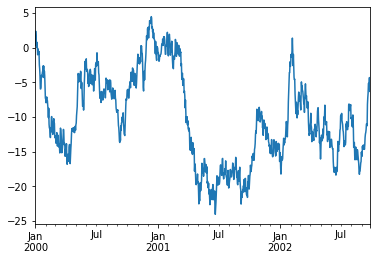

In [89]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

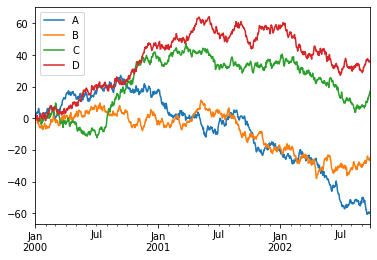

In [87]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')